In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/MINDX Python/data.xlsx', header=[1])

In [4]:
df.head(5)

,State,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
0,Alabama,117600,42081,22984,71.1
1,Alaska,229100,66521,30726,64.7
2,Arizona,215000,50448,25680,67.4
3,Arkansas,102300,39267,21274,67.7
4,California,458500,60883,29188,57.4


In [5]:
headers = ['Home Value', 'HH Inc',	'Per Cap Inc', 'Pct Owner Occ']
descriptive_df = pd.DataFrame(columns=['Mean','Median','Range','Standard Deviation'], index=['Home Value', 'HH Inc',	'Per Cap Inc', 'Pct Owner Occ'])
for header in headers:
  mean = df[header].mean()
  median = df[header].median()
  range = df[header].max() - df[header].min()
  std = df[header].std()

  descriptive_df.loc[header, 'Mean'] = mean
  descriptive_df.loc[header, 'Median'] = median
  descriptive_df.loc[header, 'Range'] = range
  descriptive_df.loc[header, 'Standard Deviation'] = std

In [6]:
descriptive_df

,Mean,Median,Range,Standard Deviation
Home Value,204107.843137,173300.0,442900,98746.566205
HH Inc,51776.392157,49424.0,32766,8357.417659
Per Cap Inc,26983.196078,25803.0,22101,4329.312929
Pct Owner Occ,67.868627,69.2,31.1,5.376857


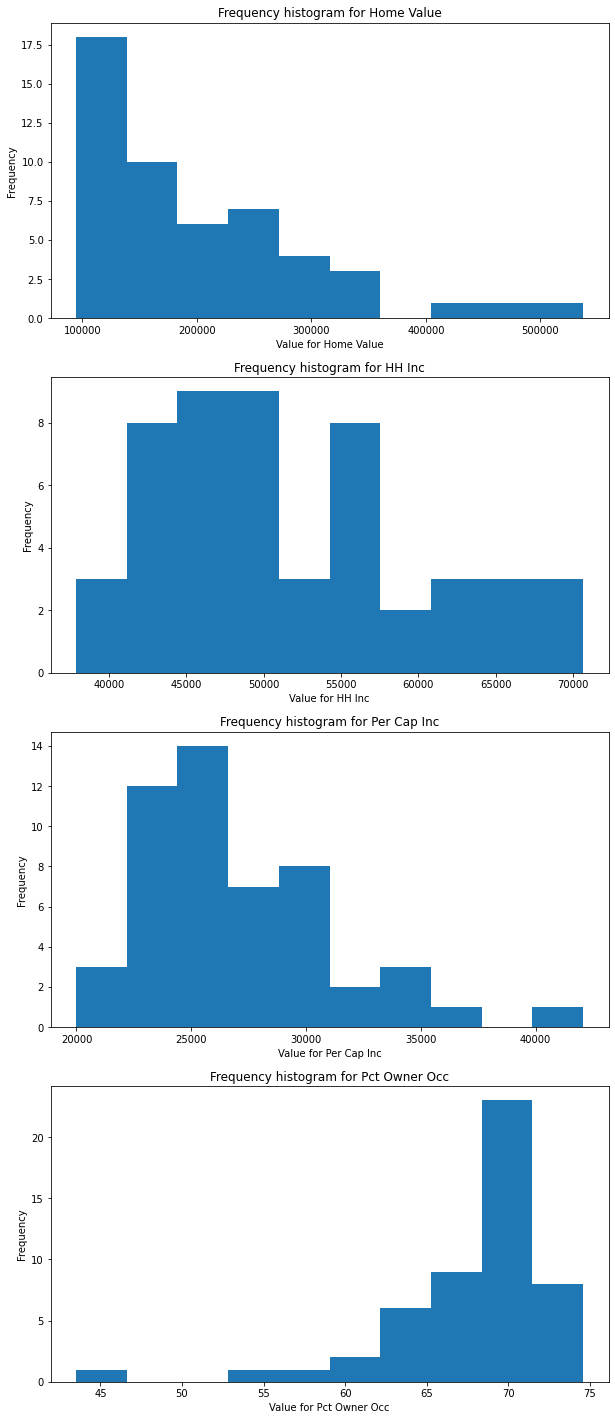

In [7]:
plt.figure(figsize=(10,25))
for index, header in enumerate(headers):
  plt.subplot(4,1,index+1)
  plt.hist(df[header])
  plt.title("Frequency histogram for "+ header)
  plt.xlabel('Value for '+header)
  plt.ylabel('Frequency')

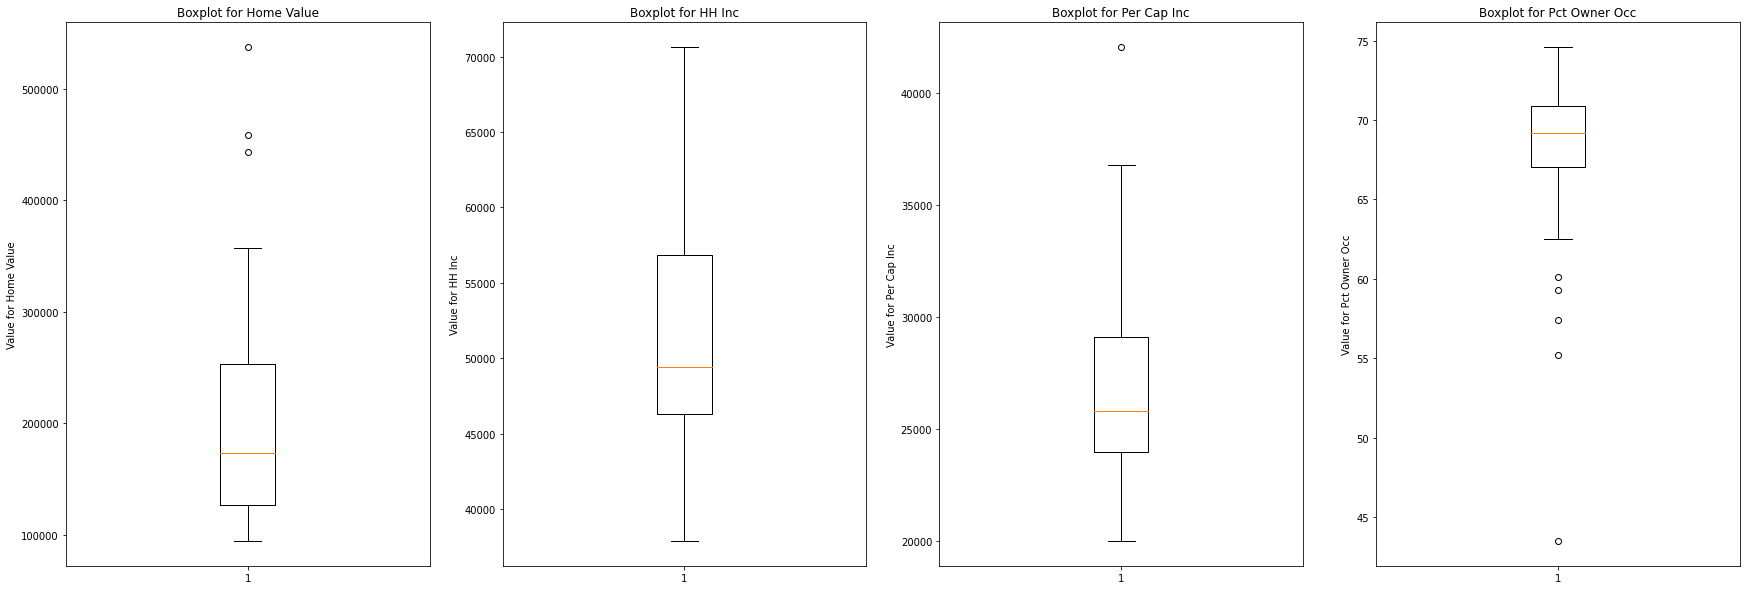

In [8]:
plt.figure(figsize=(30,10))
for index, header in enumerate(headers):
  plt.subplot(1,4,index+1)
  plt.boxplot(df[header])
  plt.title("Boxplot for "+ header)
  plt.ylabel('Value for '+header)

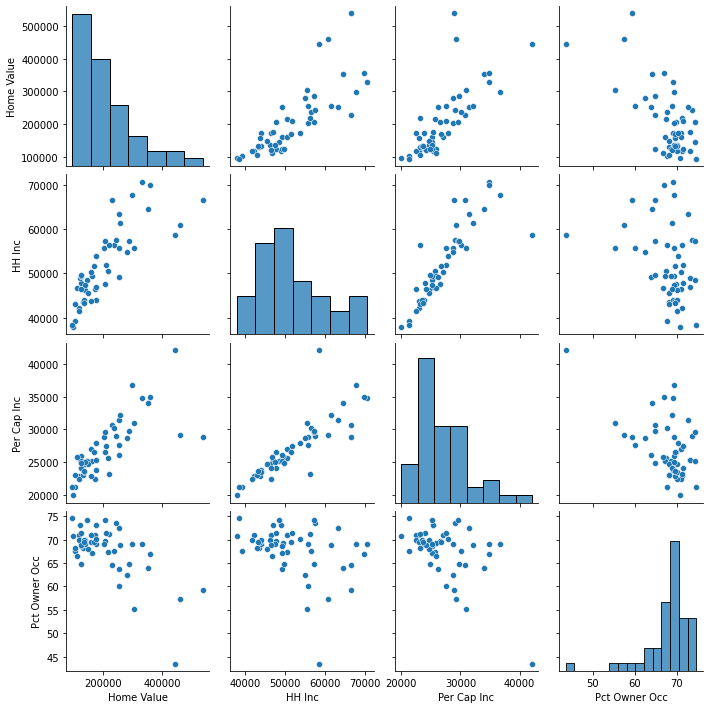

In [9]:
sns.pairplot(df[['Home Value', 'HH Inc',	'Per Cap Inc', 'Pct Owner Occ']])

In [10]:
corr_df = df[['Home Value', 'HH Inc',	'Per Cap Inc', 'Pct Owner Occ']].corr()

In [11]:
corr_df

,Home Value,HH Inc,Per Cap Inc,Pct Owner Occ
Home Value,1.000000,0.803462,0.766173,-0.659473
HH Inc,0.803462,1.000000,0.858159,-0.339409
Per Cap Inc,0.766173,0.858159,1.000000,-0.531749
Pct Owner Occ,-0.659473,-0.339409,-0.531749,1.000000


1. Mức độ tập trung và sự phân bố dữ liệu của:
* Home value: Dữ liệu có xu hướng tập trung về phía bên trái và trải dài vì có range cũng như standard deviation khá lớn
* HH Inc: Dữ liệu có xu hướng lệch phải
* Per Cap Inc: Dữ liệu cũng có xu hướng lệch phải
* Pct Owner Occ: Dữ liệu có xu hướng lệch trái vì giá trị của median lớn hơn mean. 

2. Nhận xét về sự phân bố dữ liệu cho các biến
* Giá trị của home value có xu hướng right-skewed. Phần lớn giá nhà dưới 100.000 cho tới khoản dưới 360.000
* Tương tự, Per Cap Inc có dữ liệu với xu hướng right-skewed, tập trung chủ yếu từ khoản 20.000 tới dưới 36.000
* Trái lại, dữ liệu cho Pct Owner Occ có xu hướng left-skewed, phần trăm số nhà có chủ sở hữu nằm từ khoản 55% đến dưới 75% và có khá nhiều dữ liệu outliers
* Trong khi đó thì dữ liệu cho HH Inc phân bố khá đồng đều

3. Xét về sự tương quan giữa các biến thì
* Với biến home value thì cả ba biến là HH Inc, Per Cap Inc và Pct Owner Occ đều có sự tương quan với giá trị của home value (mối quan hệ tuyến tính). Trong khi HH Inc và Per Cap Inc có tương quan đồng biến với home value thì Pct Owner Occ lại có tương quan nghịch biến với home value. 
* Với biến HH Inc thì Per Cap Inc và Pct Owner Occ đều có mối quan hệ tuyến tính với HH Inc. Nếu Per Cap Inc có sự tương quan đồng biến với HH Inc thì Pct Owner Occ có sự tương quan nghịch biến với HH Inc (tuy nhiên sự tương quan này lại không quá rõ rệt)
* Với biến Per Cap Inc thì Pct Owner Occ đều có sự tương quan với giá trị của home value (mối quan hệ tuyến tính). Pct Owner Occ lại có tương quan nghịch biến với Per Cap Inc. 

4. Trong các biến thì HH Inc (thu nhập gia đình) có tác động mạnh nhất (correlation coeficient cao nhất)

Tìm outliers đối với từng biến

In [12]:
def find_outliers(data):
  Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR
  arr = np.array(data)
  return arr[np.where((arr<lower)|(arr>upper))]

In [13]:
find_outliers(df['Home Value'])

array([458500, 443300, 537400])

In [14]:
find_outliers(df['HH Inc'])

array([], dtype=int64)

In [15]:
find_outliers(df['Per Cap Inc'])

array([42078])

In [16]:
find_outliers(df['Pct Owner Occ'])

array([57.4, 43.5, 59.3, 60.1, 55.2])